# 多クラス分類（Multi-Class Classification）

ロジスティック回帰では、データを2つのクラスに分類する方法を学びました。しかし、実社会ではサンプルが3つ以上のクラスに分けられる問題も多くあります。

ここからのレクチャーでは、こうした問題に対応出来る、多クラス分類の方法を学びます。

    1.) Iris（アヤメ）データの紹介
    2.) ロジスティック回帰を使った多クラス分類の紹介
    3.) データの準備
    4.) データの可視化
    5.) scikit-learnを使った多クラス分類
    6.) K近傍法（K Nearest Neighbors）の紹介
    7.) scikit-learnを使ったK近傍法
    8.) まとめ

### Step 1: Iris（アヤメ）のデータ

機械学習のサンプルデータとして非常によく使われるデータセットがあります。
それが、[Iris（アヤメ）のデータ](http://en.wikipedia.org/wiki/Iris_flower_data_set) です。

このデータセットは、イギリスの統計学者ロナルド・フィッシャーによって、1936年に紹介されました。

3種類のアヤメについて、それぞれ50サンプルのデータがあります。それぞれ、Iris setosa、Iris virginica、Iris versicolorという名前がついています。全部で150のデータになっています。4つの特徴量が計測されていて、これが説明変数になります。4つのデータは、花びら（petals）と萼片（sepals）の長さと幅です。

[花びら（petals）と萼片（sepals）](https://ja.wikipedia.org/wiki/%E8%90%BC)

データの概要をまとめておきましょう。

3つのクラスがあります。

    Iris-setosa (n=50)
    Iris-versicolor (n=50)
    Iris-virginica (n=50)

説明変数は4つです。

    萼片（sepal）の長さ（cm）
    萼片（sepal）の幅（cm）
    花びら（petal）の長さ（cm）
    花びら（petal）の幅（cm）

### Step 2: 多クラス分類の紹介

最も基本的な多クラス分類の考え方は、「1対その他（one vs all, one vs rest）」というものです。
複数のクラスを、「注目するクラス」と「その他のすべて」に分けて、この2クラスについて、ロジスティック回帰の手法を使います。

どのクラスに分類されるかは、回帰の結果もっとも大きな値が割り振られたクラスなります。

後半では、K近傍法という別の方法を紹介します。

### Step 3: データの準備

In [31]:
import numpy as np
import pandas as pd
from pandas import Series,DataFrame

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

%matplotlib inline

In [32]:
plt.style.use('seaborn-whitegrid')

In [33]:
from sklearn.datasets import load_iris

In [34]:
iris = load_iris()

In [35]:
X = iris.data

In [36]:
Y = iris.target

In [37]:
print(iris.DESCR)

Iris Plants Database

Notes
-----
Data Set Characteristics:
    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20  0.76     0.9565  (high!)
    ============== ==== ==== ======= ===== ====================

    :Missing Attribute Values: None
  

In [38]:
X

array([[ 5.1,  3.5,  1.4,  0.2],
       [ 4.9,  3. ,  1.4,  0.2],
       [ 4.7,  3.2,  1.3,  0.2],
       [ 4.6,  3.1,  1.5,  0.2],
       [ 5. ,  3.6,  1.4,  0.2],
       [ 5.4,  3.9,  1.7,  0.4],
       [ 4.6,  3.4,  1.4,  0.3],
       [ 5. ,  3.4,  1.5,  0.2],
       [ 4.4,  2.9,  1.4,  0.2],
       [ 4.9,  3.1,  1.5,  0.1],
       [ 5.4,  3.7,  1.5,  0.2],
       [ 4.8,  3.4,  1.6,  0.2],
       [ 4.8,  3. ,  1.4,  0.1],
       [ 4.3,  3. ,  1.1,  0.1],
       [ 5.8,  4. ,  1.2,  0.2],
       [ 5.7,  4.4,  1.5,  0.4],
       [ 5.4,  3.9,  1.3,  0.4],
       [ 5.1,  3.5,  1.4,  0.3],
       [ 5.7,  3.8,  1.7,  0.3],
       [ 5.1,  3.8,  1.5,  0.3],
       [ 5.4,  3.4,  1.7,  0.2],
       [ 5.1,  3.7,  1.5,  0.4],
       [ 4.6,  3.6,  1. ,  0.2],
       [ 5.1,  3.3,  1.7,  0.5],
       [ 4.8,  3.4,  1.9,  0.2],
       [ 5. ,  3. ,  1.6,  0.2],
       [ 5. ,  3.4,  1.6,  0.4],
       [ 5.2,  3.5,  1.5,  0.2],
       [ 5.2,  3.4,  1.4,  0.2],
       [ 4.7,  3.2,  1.6,  0.2],
       [ 4

In [39]:
Y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [40]:
iris_data = DataFrame(X, columns=['Sepal Length','Sepal Width','Petal Length','Petal Width'])

In [41]:
iris_target = DataFrame(Y, columns=['Species'])

In [42]:
def flower(num):
    if num == 0:
        return 'Setosa'
    elif num == 1:
        return 'Veriscolour'
    else:
        return 'Virginica'

In [43]:
iris_target['Species'] = iris_target['Species'].apply(flower)

In [44]:
iris_target.head()

,Species
0,Setosa
1,Setosa
2,Setosa
3,Setosa
4,Setosa


In [45]:
iris = pd.concat([iris_data, iris_target], axis=1)

In [46]:
iris.head()

,Sepal Length,Sepal Width,Petal Length,Petal Width,Species
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


### Step 4: データの可視化
pairplotを使えば、簡単に全体像を把握できます。

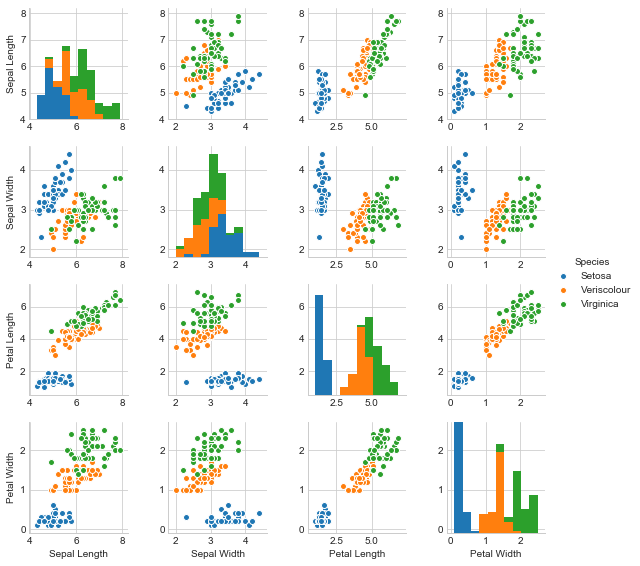

In [47]:
sns.pairplot(iris, hue='Species', size=2)

全体像がよくわかります。

特徴量でアヤメの種類を予測できそうです。特に、Setosaは最も特徴的な花のようです。

次に、花びらの長さに注目して、ヒストグラムを描いてみましょう。

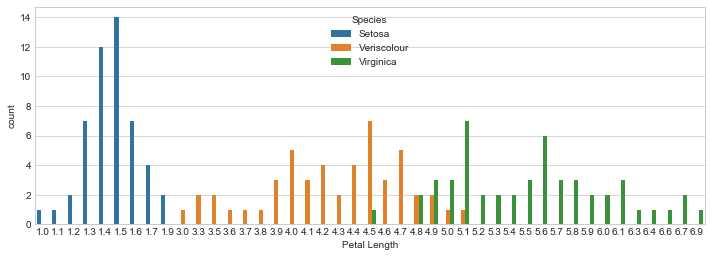

In [49]:
plt.figure(figsize=(12,4))
sns.countplot('Petal Length', data=iris, hue='Species')

その他の特徴量についても、可視化してみてください。

1対その他の方法論で、ロジスティック回帰を使った多クラス分類の挑戦してみましょう。

### Step 5: scikit-learnを使った多クラス分類

すでに説明変数Xと、目的変数Yが用意されているので、これを使って解析を進めて行きます。

データを学習用とテストように分けておきましょう。全体の40％がテストデータになるようにします。

In [52]:
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import train_test_split

In [53]:
logreg = LogisticRegression()

In [54]:
# データを分割します。テストが全体の40%になるようにします。
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.4,random_state=3)

In [55]:
logreg.fit(X_train, Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [56]:
from sklearn import metrics

In [57]:
Y_pred = logreg.predict(X_test)

In [58]:
Y_pred

array([0, 0, 0, 0, 0, 2, 1, 0, 2, 1, 1, 0, 1, 1, 2, 0, 2, 2, 2, 0, 2, 2, 2,
       1, 0, 2, 2, 1, 1, 1, 0, 0, 2, 1, 0, 0, 2, 0, 2, 1, 2, 1, 0, 0, 2, 1,
       0, 2, 2, 2, 0, 0, 2, 1, 1, 0, 2, 0, 2, 1])

In [59]:
metrics.accuracy_score(Y_test, Y_pred)

0.93333333333333335

93%と高い精度が得られました。random_stateを指定すれば、再現性がある結果を得ることができます。

次に、K近傍法に進んで行きましょう。

### Step 6: K近傍法

K近傍法は英語で、k-nearest neighborなので、kNNと略されることもありますが、極めてシンプルな方法論です。

学習のプロセスは、単純に学習データを保持するだけです。新しいサンプルが、どちらのクラスに属するかを予測するときにだけ、すこし計算をします。

与えられたサンプルのk個の隣接する学習データのクラスを使って、このサンプルのクラスを予測します。
イメージをうまく説明した図がこちら。

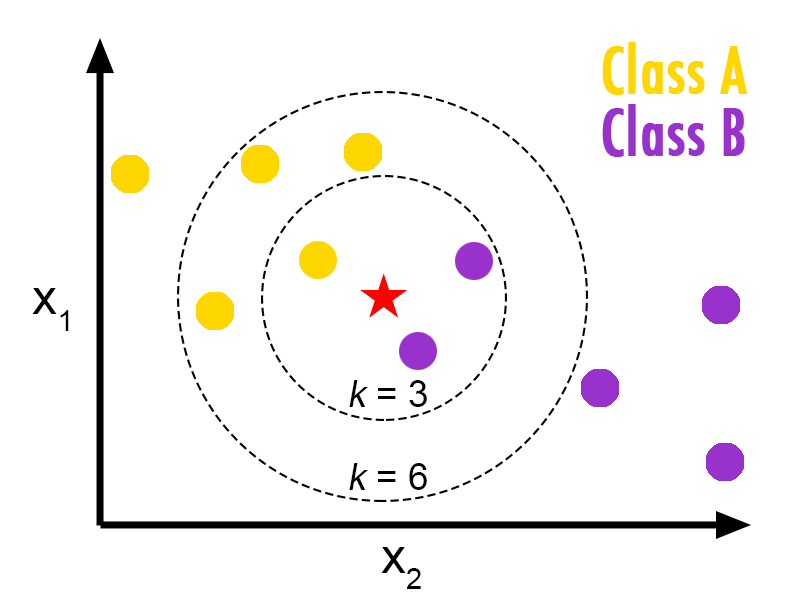

In [61]:
from IPython.display import Image
Image('http://bdewilde.github.io/assets/images/2012-10-26-knn-concept.png',width=400, height=300)

In [62]:
from sklearn.neighbors import KNeighborsClassifier

### k=6で実施

In [63]:
knn = KNeighborsClassifier(n_neighbors=6)

In [64]:
knn.fit(X_train, Y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=6, p=2,
           weights='uniform')

In [65]:
Y_pred = knn.predict(X_test)

In [66]:
metrics.accuracy_score(Y_test, Y_pred)

0.94999999999999996

### k=1で実施

In [70]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, Y_train)
Y_pred = knn.predict(X_test)
metrics.accuracy_score(Y_test, Y_pred)

0.96666666666666667

### kを変化

In [71]:
k_range = range(1, 90)
accuracy = []

In [73]:
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, Y_train)
    Y_pred = knn.predict(X_test)
    accuracy.append(metrics.accuracy_score(Y_test, Y_pred))

Text(0,0.5,'Testing accuracy')

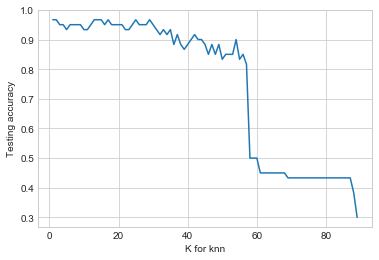

In [74]:
plt.plot(k_range, accuracy)
plt.xlabel('K for knn')
plt.ylabel('Testing accuracy')

学習用のデータとテスト用のデータを分けるやり方を変えると、これらの結果がどうなるか、検討してみるのも面白いかもしれません。


### Step 8: まとめ

ロジスティック回帰とk近傍法を使った多クラス分類について学びました。

英語になりますが、参考資料をいくつかあげておきます。

1.) [Wikipedia on Multiclass Classification](http://en.wikipedia.org/wiki/Multiclass_classification)

2.) [MIT Lecture Slides on MultiClass Classification](http://www.mit.edu/~9.520/spring09/Classes/multiclass.pdf)

3.) [Sci Kit Learn Documentation](http://scikit-learn.org/stable/modules/multiclass.html)

4.) [DataRobot on Classification Techniques](http://www.datarobot.com/blog/classification-with-scikit-learn/)